# Q2 Artificial Neral Network (ANN) for Digits (0-9) Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf

In [2]:
# For one hot encoding our labels as they are multiclass
def one_hot_encode(label):
    encoded = [0 for _ in range(10)]
    encoded[label] = 1
    return encoded

## Reading images from relevant directory

In [3]:
digits_images = []
labels = []
for i in range(0,10):
    for file in os.listdir('data-digits/{}'.format(i)):
        labels.append(one_hot_encode(i))
        image = cv2.imread('data-digits/{}/{}'.format(i, file), cv2.IMREAD_GRAYSCALE)
        digits_images.append(image)

digits_images = np.where(np.array(digits_images)==255, 0, 1)  # To binary form from grayscale image, if you pass grayscale image network would not learn at all (I tried)
labels = np.array(labels)
print(np.array(digits_images).shape)
print(np.array(labels).shape)

(500, 100, 100)
(500, 10)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


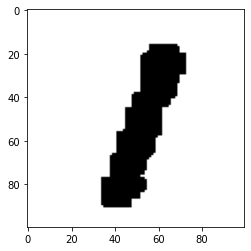

In [12]:
print(digits_images[0:2], '\n')
print(labels[0:2])
plt.imshow(digits_images[80], cmap='binary')

## Justification
- We would be using **Tensorflow** for making ANN, as it was **mentioned in video recording that we can use any machine library for q2**

- Input shape would be (100,100,) as each this is the dimension of each image but we would be flattening this into 1D array

- This would be passed to the layer with neurons 128, I tried 1000 neurons but it was taking too much time in each epoch to update weights

- Then I used layer with 64 neurons, notice that 64 and 128 are combination of 32, this is recommended by some researchers

- Output layer has 10 neurons because we need to classify digits 0-9 which makes this problem **multiclassification** prolem, in multiclassification problem in neural network we tend to use **softmax** as output layer activation function and we cannot use sigmoid as it is used in multilabel problem but in our problem each image cannot be multilabeled as it can be only one of 0-9 digits so thats why softmax.
- Categorical crossentropy is the Error here, as we are also in multiclassification problem

In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(100,100,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,289,034
Trainable params: 1,289,034
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x=digits_images, y=labels, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 11ms/step - loss: 3.9197 - accuracy: 0.2214
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.8395 - accuracy: 0.7245
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6024 - accuracy: 0.7964
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3817 - accuracy: 0.8889
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.4545 - accuracy: 0.8639
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1801 - accuracy: 0.9538
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.3983 - accuracy: 0.8948
Epoch 8/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0861 - accuracy: 0.9717
Epoch 9/100
16/16 [==============================] - 0s 19ms/step - loss: 0.1015 - accuracy: 0.9692
Epoch 10/100
16/16 [==============================] - 0s 16ms/step - loss: 0.1106 - accuracy: 0.9629

16/16 [==============================] - 0s 13ms/step - loss: 6.7618e-07 - accuracy: 1.0000
Epoch 81/100
16/16 [==============================] - 0s 17ms/step - loss: 4.2560e-07 - accuracy: 1.0000
Epoch 82/100
16/16 [==============================] - 0s 16ms/step - loss: 3.3369e-07 - accuracy: 1.0000
Epoch 83/100
16/16 [==============================] - 0s 20ms/step - loss: 1.6350e-07 - accuracy: 1.0000
Epoch 84/100
16/16 [==============================] - 0s 19ms/step - loss: 1.1096e-07 - accuracy: 1.0000
Epoch 85/100
16/16 [==============================] - 0s 17ms/step - loss: 6.4643e-08 - accuracy: 1.0000
Epoch 86/100
16/16 [==============================] - 0s 13ms/step - loss: 4.5711e-08 - accuracy: 1.0000
Epoch 87/100
16/16 [==============================] - 0s 12ms/step - loss: 3.0814e-08 - accuracy: 1.0000
Epoch 88/100
16/16 [==============================] - 0s 19ms/step - loss: 2.6631e-08 - accuracy: 1.0000
Epoch 89/100
16/16 [==============================] - 0s 20ms/step -

In [8]:
for ind, image in enumerate(digits_images):
    print('actual:', np.argmax(labels[ind]), 'predicted:', np.argmax((model.predict(np.array([digits_images[ind]])))))

actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 predicted: 0
actual: 0 p

actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 7 predicted: 7
actual: 8 p

In [ ]:
# df = pd.read_csv('digits-data/train.csv')

# for n in range(4, 10):
#     c = 0
#     for i in df[df['label']==n].index:

#         if c==54:  # First 54 only, 54 so can remove faltooo later
#             break
#         array = df.iloc[i].to_numpy()[1:]
#         image_np = array.reshape(28,28)
#         image = resize(image_np, (100,100))

#         plt.imsave('data-digits/{}/{}.png'.format(n, c), image, cmap='binary')
#         c += 1    
    
# plt.imshow(image, cmap='binary')